# ***Covid-19 Analysis***

In [ ]:
#Importing Necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.dates as mdates
from datetime import date, timedelta

#### Covid Symptom Analysis

In [ ]:
# Creating the Symptoms Data Frame with Symptoms and their Percentage effects on Corona

symptoms={'symptom':['Fever','Dry cough','Fatigue','Sputum production','Shortness of breath','Muscle pain','Sore throat',
        'Headache','Chills','Nausea or vomiting','Nasal congestion','Diarrhoea','Haemoptysis',
        'Conjunctival congestion'],'percentage':[87.9,67.7,38.1,33.4,18.6,14.8,13.9,13.6,11.4,5.0,4.8,3.7,0.9,0.8]}

symptoms=pd.DataFrame(data=symptoms)
symptoms

,symptom,percentage
0,Fever,87.9
1,Dry cough,67.7
2,Fatigue,38.1
3,Sputum production,33.4
4,Shortness of breath,18.6
5,Muscle pain,14.8
6,Sore throat,13.9
7,Headache,13.6
8,Chills,11.4
9,Nausea or vomiting,5.0


In [ ]:
# Visualizing the Symptoms percentage using Barplot

fig = px.bar(symptoms[['symptom', 'percentage']].sort_values('percentage',ascending=False), 
             y="percentage", x="symptom", color='symptom', 
             log_y=True, template='ggplot2', title='Symptom of  Coronavirus')
fig.show()

In [ ]:
# Vizualizing the Symptoms percentage through Pie Chart

fig = px.pie(symptoms,
             values="percentage",
             names="symptom",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# **Visualizations through Patient.csv data**

In [ ]:
#Reading the covid_data.csv Dataset

df=pd.read_csv('patient.csv')
df.head(10)

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released
5,6,male,1964.0,Korea,capital area,NaN,contact with patient,2.0,3.0,17.0,2020-01-30,2020-02-19,NaN,released
6,7,male,1991.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,9.0,2020-01-30,2020-02-15,NaN,released
7,8,female,1957.0,Korea,Jeollabuk-do,NaN,visit to Wuhan,1.0,NaN,113.0,2020-01-31,2020-02-12,NaN,released
8,9,female,1992.0,Korea,capital area,NaN,contact with patient,2.0,5.0,2.0,2020-01-31,2020-02-24,NaN,released
9,10,female,1966.0,Korea,capital area,NaN,contact with patient,3.0,6.0,43.0,2020-01-31,2020-02-19,NaN,released


In [ ]:
#Shape of the Dataset

df.shape

(5328, 14)

In [ ]:
#Column Names in the Dataset

df.columns

Index(['id', 'sex', 'birth_year', 'country', 'region', 'group',
       'infection_reason', 'infection_order', 'infected_by', 'contact_number',
       'confirmed_date', 'released_date', 'deceased_date', 'state'],
      dtype='object')

In [ ]:
#Data type of each attribute in the set

df.dtypes

id                    int64
sex                  object
birth_year          float64
country              object
region               object
group                object
infection_reason     object
infection_order     float64
infected_by         float64
contact_number      float64
confirmed_date       object
released_date        object
deceased_date        object
state                object
dtype: object

In [ ]:
#Information reggearding the Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5328 entries, 0 to 5327
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5328 non-null   int64  
 1   sex               383 non-null    object 
 2   birth_year        370 non-null    float64
 3   country           5328 non-null   object 
 4   region            371 non-null    object 
 5   group             81 non-null     object 
 6   infection_reason  140 non-null    object 
 7   infection_order   35 non-null     float64
 8   infected_by       70 non-null     float64
 9   contact_number    47 non-null     float64
 10  confirmed_date    5328 non-null   object 
 11  released_date     32 non-null     object 
 12  deceased_date     20 non-null     object 
 13  state             5328 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 582.9+ KB


In [ ]:
#Describing the Dataset

df.describe()

,id,birth_year,infection_order,infected_by,contact_number
count,5328.000000,370.000000,35.000000,70.000000,47.000000
mean,2664.500000,1973.589189,2.285714,379.000000,72.978723
std,1538.205448,17.560546,1.405272,540.247528,188.155288
min,1.000000,1932.000000,1.000000,3.000000,0.000000
25%,1332.750000,1960.000000,1.000000,29.250000,2.500000
50%,2664.500000,1974.000000,2.000000,126.000000,16.000000
75%,3996.250000,1987.750000,3.000000,563.250000,46.000000
max,5328.000000,2018.000000,6.000000,2621.000000,1160.000000


In [ ]:
#Describing the Dataset

df.describe(include="all")

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
count,5328.000000,383,370.000000,5328,371,81,140,35.000000,70.000000,47.000000,5328,32,20,5328
unique,NaN,2,NaN,3,13,6,14,NaN,NaN,NaN,29,17,11,3
top,NaN,female,NaN,Korea,capital area,Shincheonji Church,contact with patient,NaN,NaN,NaN,2020-03-01,2020-02-19,2020-02-23,isolated
freq,NaN,194,NaN,5319,165,51,71,NaN,NaN,NaN,1062,4,4,5273
mean,2664.500000,NaN,1973.589189,NaN,NaN,NaN,NaN,2.285714,379.000000,72.978723,NaN,NaN,NaN,NaN
std,1538.205448,NaN,17.560546,NaN,NaN,NaN,NaN,1.405272,540.247528,188.155288,NaN,NaN,NaN,NaN
min,1.000000,NaN,1932.000000,NaN,NaN,NaN,NaN,1.000000,3.000000,0.000000,NaN,NaN,NaN,NaN
25%,1332.750000,NaN,1960.000000,NaN,NaN,NaN,NaN,1.000000,29.250000,2.500000,NaN,NaN,NaN,NaN
50%,2664.500000,NaN,1974.000000,NaN,NaN,NaN,NaN,2.000000,126.000000,16.000000,NaN,NaN,NaN,NaN
75%,3996.250000,NaN,1987.750000,NaN,NaN,NaN,NaN,3.000000,563.250000,46.000000,NaN,NaN,NaN,NaN


In [ ]:
#Checking for presence of Null Values in Dataset

df.isnull().sum()

id                     0
sex                 4945
birth_year          4958
country                0
region              4957
group               5247
infection_reason    5188
infection_order     5293
infected_by         5258
contact_number      5281
confirmed_date         0
released_date       5296
deceased_date       5308
state                  0
dtype: int64

In [ ]:
#Converting the object type of "confirmed_date", "released_date", "deceased_date" into datetime type

date_cols = ["confirmed_date", "released_date", "deceased_date"]
for col in date_cols:
    df[col] = pd.to_datetime(df[col])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



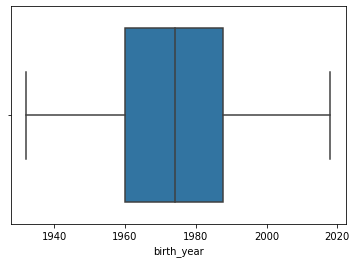

In [ ]:
#BoxPlot for checking outliers in birth_year

sns.boxplot(df['birth_year'])

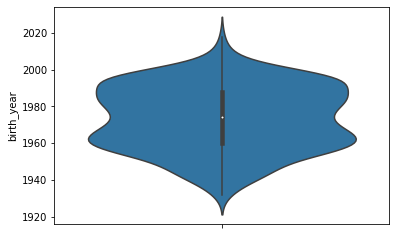

In [ ]:
#ViolinPlot for Outliers in Birth_year

sns.violinplot(y='birth_year',data=df)

From the above BoxPlot and ViolinPlot , we can say that there are no outliers present in the birth_year attribute.

In [ ]:
#Counting the total no.of Confirmed cases

df.confirmed_date = pd.to_datetime(df.confirmed_date)
daily_count = df.groupby(df.confirmed_date).id.count()
accumulated_count = daily_count.cumsum()

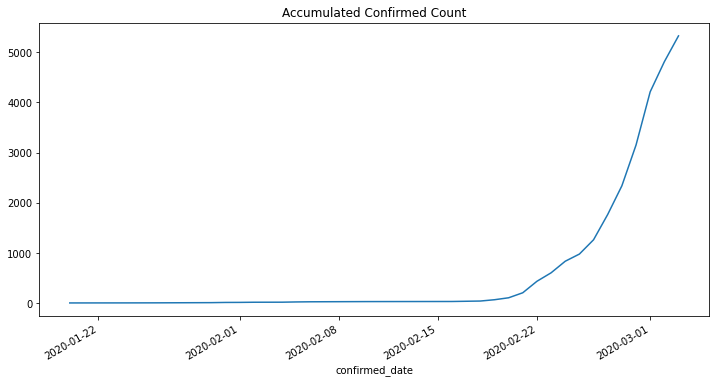

In [ ]:
#plotting the Accumulated count of confirmed cases

plt.figure(figsize=(12,6))
accumulated_count.plot()
plt.title('Accumulated Confirmed Count');

From the above plot, we can infer that the initial case was noted on January 2020, and the count of accumulated cases got increased on March 2020 as spike risies.

In [ ]:
# Calculating the number of Duration Days

df["time_to_release_since_confirmed"] = df["released_date"] - df["confirmed_date"]

df["time_to_death_since_confirmed"] = df["deceased_date"] - df["confirmed_date"]

df["duration_since_confirmed"] = df[["time_to_release_since_confirmed", "time_to_death_since_confirmed"]].min(axis=1)

df["duration_days"] = df["duration_since_confirmed"].dt.days


df.head()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,time_to_release_since_confirmed,time_to_death_since_confirmed,duration_since_confirmed,duration_days
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaT,released,17 days,NaT,17 days,17.0
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaT,released,12 days,NaT,12 days,12.0
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaT,released,17 days,NaT,17 days,17.0
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaT,released,13 days,NaT,13 days,13.0
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaT,released,32 days,NaT,32 days,32.0


In [ ]:
#Current status of patient using Pie chart

states = pd.DataFrame(df["state"].value_counts())

states["status"] = states.index

states.rename(columns={"state": "count"}, inplace=True)

fig = px.pie(states, values="count", names="status", title="Current state of patients", template="seaborn")

fig.update_traces(rotation=90, pull=0.05, textinfo="value+percent+label")

fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



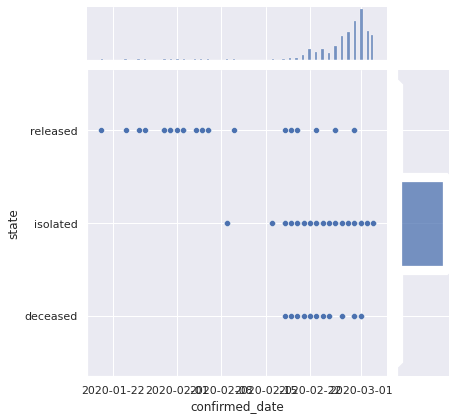

In [ ]:
#Joint plot of Confirmed date vs state

sns.jointplot(df.confirmed_date,df.state);

In [ ]:
#Calculating the age from birth_year

df['age'] = 2021 - df['birth_year'] 
df['age'].head(5)

0    37.0
1    57.0
2    55.0
3    57.0
4    34.0
Name: age, dtype: float64

In [ ]:
print("Minimum age in the data is:",df.age.min())
print("Maximum age in the data is:",df.age.max())
print("Range of age is from {} to {}, value is {}".format(df.age.min(),df.age.max(),df.age.max()-df.age.min()))

Minimum age in the data is: 3.0
Maximum age in the data is: 89.0
Range of age is from 3.0 to 89.0, value is 86.0


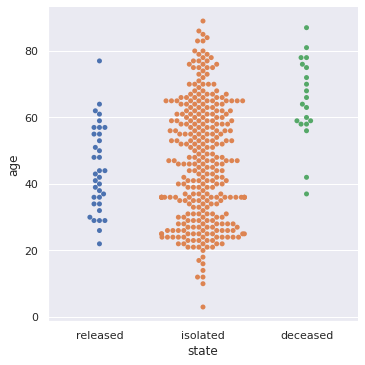

In [ ]:
#Plotting the age distribution over state of person using catplot

sns.set(style="darkgrid")
sns.catplot(y="age", x="state", kind="swarm", data=df)

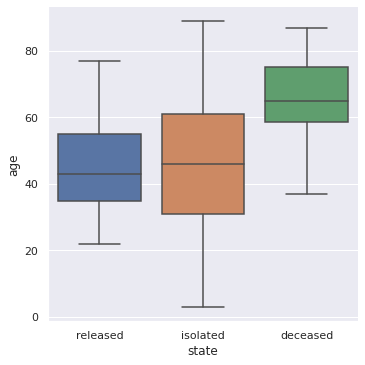

In [ ]:
#Box plot of age vs state

sns.catplot(y="age", x="state", kind="box", data=df)

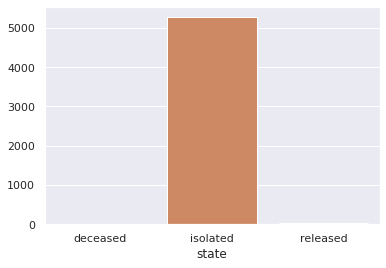

In [ ]:
 #Barplot of total count of cases in Deceased , Isolated and Released 
 
 c = df.groupby('state')['state'].count()
 sns.barplot(x=c.index, y=c.values);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



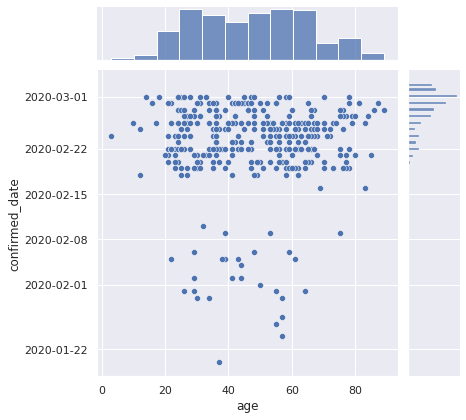

In [ ]:
#Joint plot of age vs Confirmedd date

sns.jointplot(df.age,df.confirmed_date)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



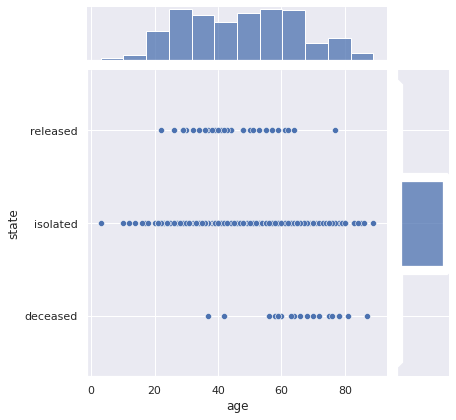

In [ ]:
#Joint plot of age vs state

sns.jointplot('age','state',data=df);

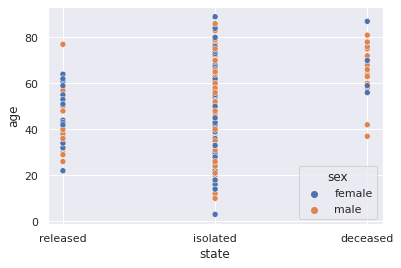

In [ ]:
 #scatterplot of age vs state over gender
 
 sns.scatterplot(x='state', y='age', data=df,hue='sex');

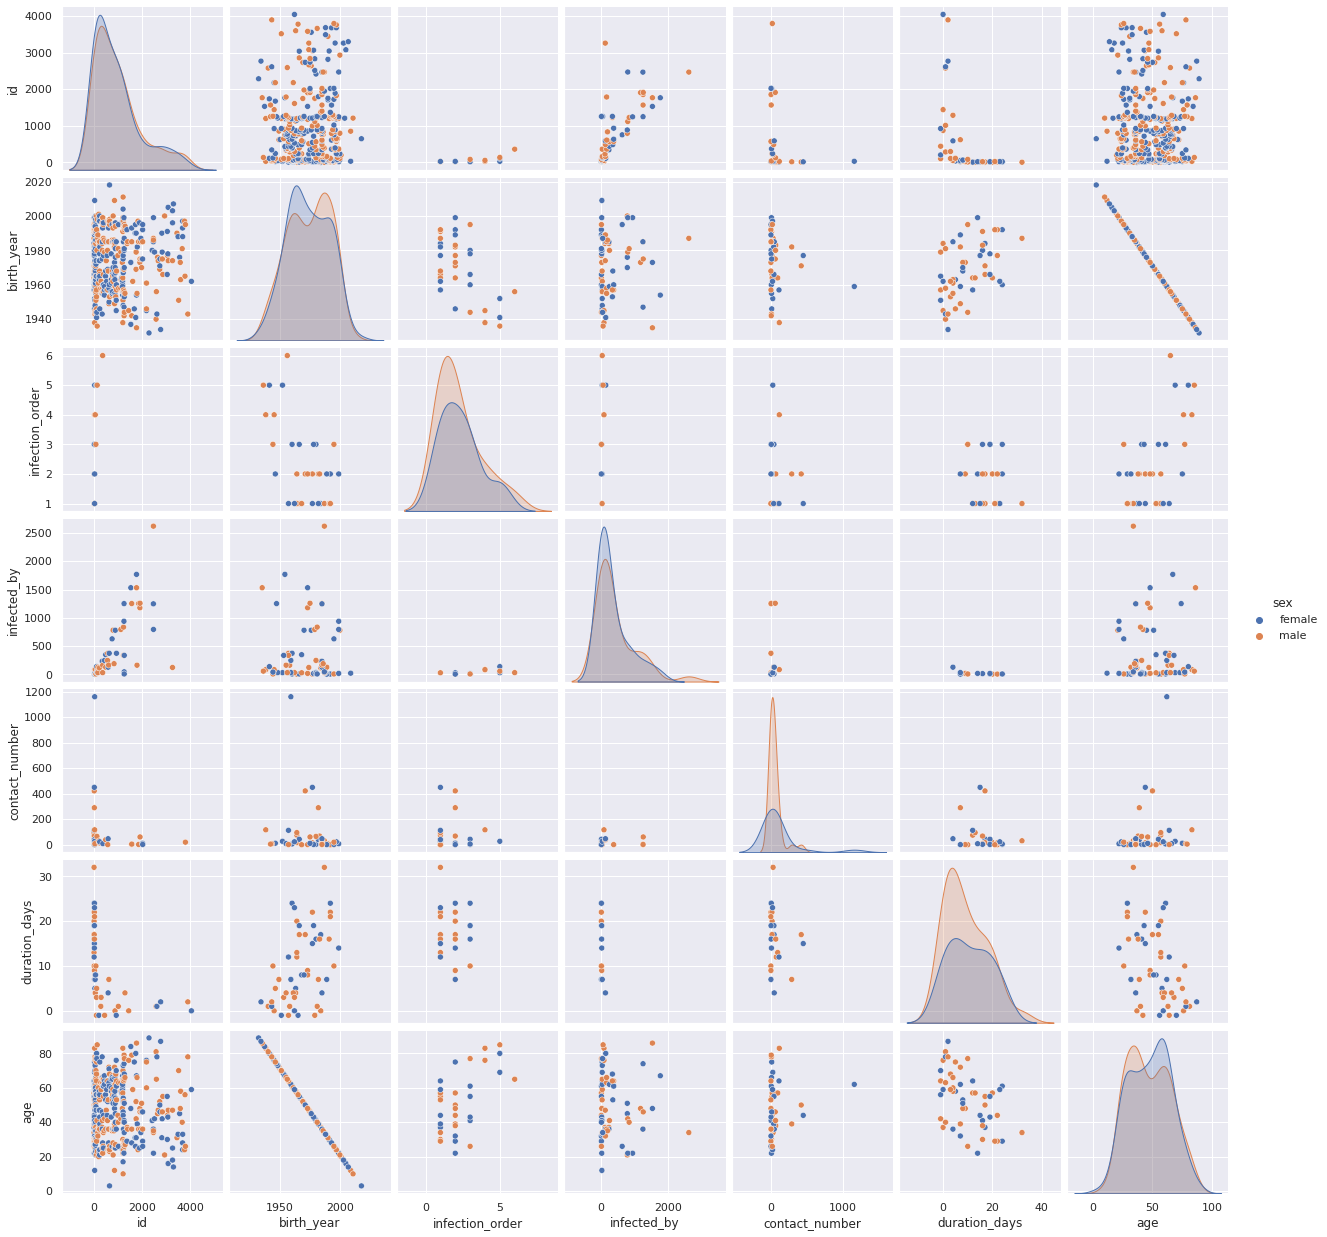

In [ ]:
#pair plot of df

sns.pairplot(df, hue='sex');

In [ ]:
#Finding the percentage recovery of Patients

infected_patient = df.shape[0]

rp = df.loc[df["state"] == "released"].shape[0]
dp = df.loc[df["state"] == "deceased"].shape[0]
ip = df.loc[df["state"]== "isolated"].shape[0]

rp=rp/df.shape[0]
dp=dp/df.shape[0]
ip=ip/df.shape[0]

print("\nThe percentage of recovery is "+ str(rp*100) )
print("\nThe percentage of deceased is "+ str(dp*100) )
print("\nThe percentage of isolated is "+ str(ip*100) )


The percentage of recovery is 0.6569069069069069

The percentage of deceased is 0.37537537537537535

The percentage of isolated is 98.96771771771772


In [ ]:
#Fetching the rows of patient have state == released

released = df[df.state == 'released']
released.head()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,time_to_release_since_confirmed,time_to_death_since_confirmed,duration_since_confirmed,duration_days,age
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaT,released,17 days,NaT,17 days,17.0,37.0
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaT,released,12 days,NaT,12 days,12.0,57.0
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaT,released,17 days,NaT,17 days,17.0,55.0
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaT,released,13 days,NaT,13 days,13.0,57.0
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaT,released,32 days,NaT,32 days,32.0,34.0


In [ ]:
#Fetching the rows of state == isolated

isolated = df[df.state == 'isolated']
isolated.head(500)

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,time_to_release_since_confirmed,time_to_death_since_confirmed,duration_since_confirmed,duration_days,age
24,25,female,1946.0,Korea,capital area,NaN,contact with patient,2.0,27.0,12.0,2020-02-09,NaT,NaT,isolated,NaT,NaT,NaT,NaN,75.0
25,26,male,1968.0,Korea,capital area,NaN,contact with patient,1.0,27.0,0.0,2020-02-09,NaT,NaT,isolated,NaT,NaT,NaT,NaN,53.0
26,27,female,1982.0,China,capital area,NaN,visit to China,1.0,NaN,40.0,2020-02-09,NaT,NaT,isolated,NaT,NaT,NaT,NaN,39.0
28,29,male,1938.0,Korea,capital area,NaN,contact with patient,4.0,83.0,117.0,2020-02-16,NaT,NaT,isolated,NaT,NaT,NaT,NaN,83.0
29,30,female,1952.0,Korea,capital area,NaN,contact with patient,5.0,29.0,27.0,2020-02-16,NaT,NaT,isolated,NaT,NaT,NaT,NaN,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,536,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-23,NaT,NaT,isolated,NaT,NaT,NaT,NaN,NaN
536,537,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-23,NaT,NaT,isolated,NaT,NaT,NaT,NaN,NaN
537,538,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-23,NaT,NaT,isolated,NaT,NaT,NaT,NaN,NaN
538,539,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-23,NaT,NaT,isolated,NaT,NaT,NaT,NaN,NaN


In [ ]:
#Fetching the rows of state == deceased

died = df[df.state == 'deceased']
died.head()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,time_to_release_since_confirmed,time_to_death_since_confirmed,duration_since_confirmed,duration_days,age
37,38,female,1963.0,Korea,Daegu,NaN,NaN,NaN,NaN,NaN,2020-02-18,NaT,2020-02-23,deceased,NaT,5 days,5 days,5.0,58.0
53,54,male,1963.0,Korea,Gyeongsangbuk-do,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-19,NaT,2020-02-23,deceased,NaT,4 days,4 days,4.0,58.0
54,55,male,1961.0,Korea,Gyeongsangbuk-do,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-19,NaT,2020-02-23,deceased,NaT,4 days,4 days,4.0,60.0
102,103,male,1957.0,Korea,Gyeongsangbuk-do,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-20,NaT,2020-02-19,deceased,NaT,-1 days,-1 days,-1.0,64.0
106,107,male,1953.0,Korea,Gyeongsangbuk-do,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-21,NaT,2020-02-24,deceased,NaT,3 days,3 days,3.0,68.0


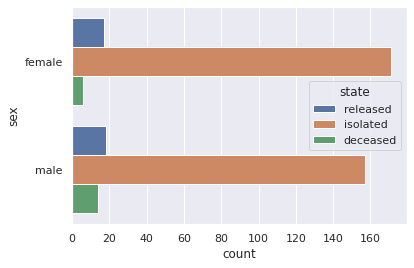

In [ ]:
#countplot over sex vs state

sns.countplot(y="sex", data=df,hue='state')

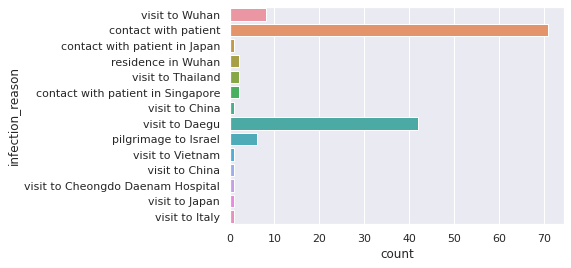

In [ ]:
#Count plot for infection_reason over gender

sns.countplot(y="infection_reason", data=df)

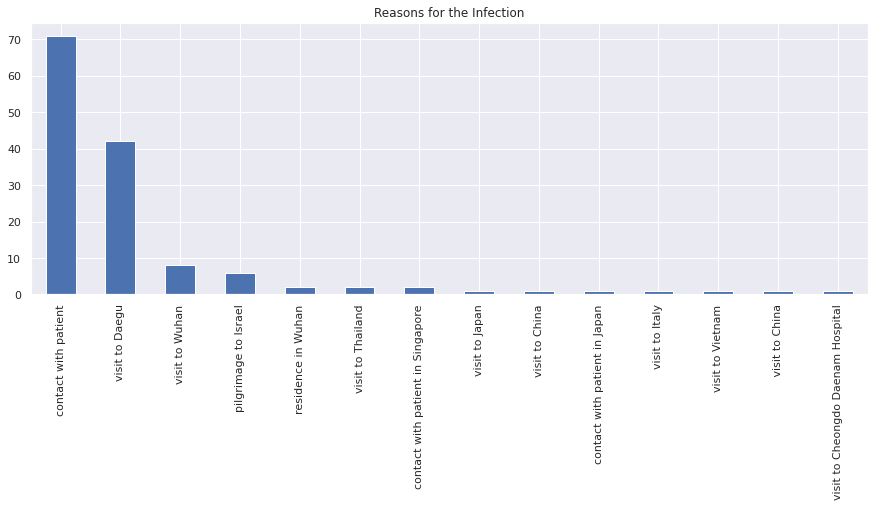

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Reasons for the Infection')
df.infection_reason.value_counts().plot.bar();



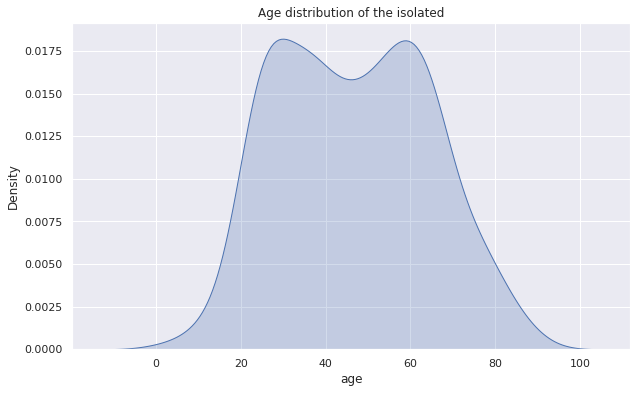

In [ ]:
#kde plot of age distribution of isolated persons

plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of the isolated")
sns.kdeplot(data=isolated['age'], shade=True)

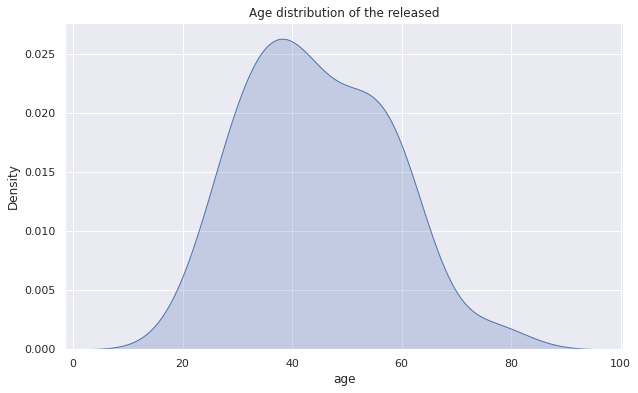

In [ ]:
#kde plot of age distribution of released persons

plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of the released")
sns.kdeplot(data=released['age'], shade=True)

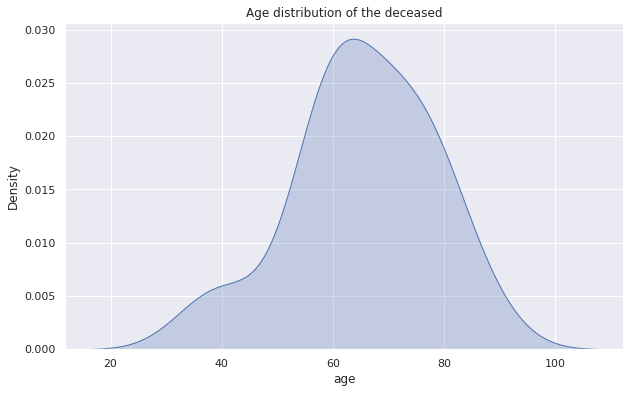

In [ ]:
#kde plot of age distribution of deceased persons

plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of the deceased")
sns.kdeplot(data=died['age'], shade=True)

In [ ]:
#Age distribution of deceased persons over gender using kdeplot

male_died = died[died.sex=='male']
female_died = died[died.sex=='female']

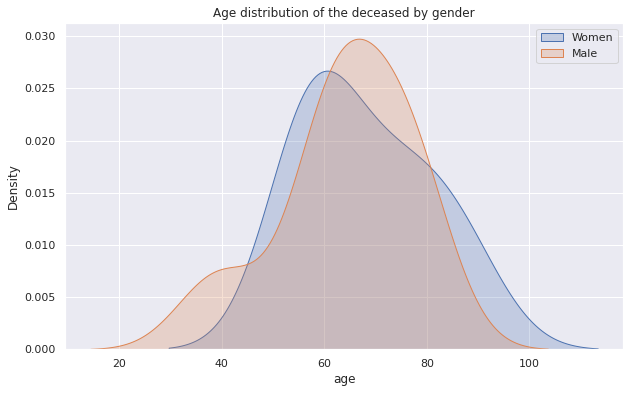

In [ ]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of the deceased by gender")
sns.kdeplot(data=female_died['age'], label="Women", shade=True)
sns.kdeplot(data=male_died['age'],label="Male" ,shade=True)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



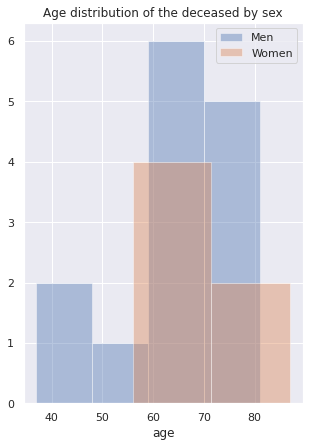

In [ ]:
#using the distplot

plt.figure(figsize=(5,7))
sns.set_style("darkgrid")
sns.distplot(a=male_died['age'], label="Men", kde=False)
sns.distplot(a=female_died['age'], label="Women", kde=False)
plt.title("Age distribution of the deceased by sex")
plt.legend()

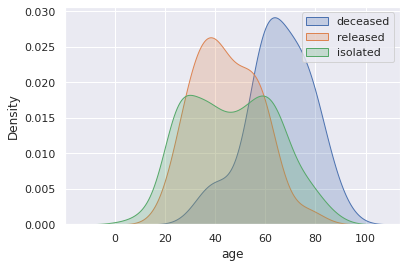

In [ ]:
#age distribution of person over state in kde plot

sns.kdeplot(data=died['age'],label='deceased', shade=True)
sns.kdeplot(data=released['age'],label='released', shade=True)
sns.kdeplot(data=isolated['age'],label='isolated', shade=True)
plt.legend()

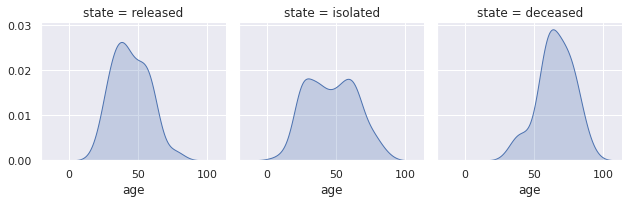

In [ ]:
#Facet grid plot of age distribution over state

g = sns.FacetGrid(df, col='state');
g.map(sns.kdeplot, 'age', shade=True);

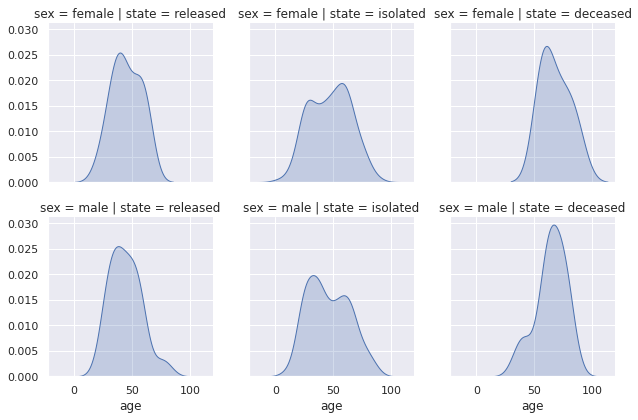

In [ ]:
#Facet grid plot of age vs state over gender

g = sns.FacetGrid(df, col='state',row='sex');
g.map(sns.kdeplot, 'age', shade=True);

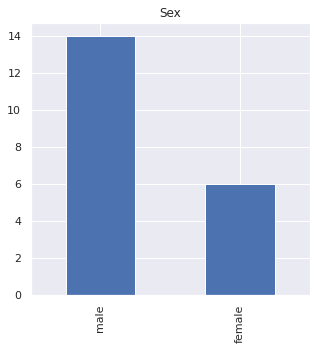

In [ ]:
#No.Of deceased persons count over gender using barplots

plt.figure(figsize=(5, 5))
plt.title('Sex')
died.sex.value_counts().plot.bar();

In [ ]:
#Pie chart shoe=wing the % of people isolated by gender

fig = px.pie( values=isolated.groupby(['sex']).size().values,names=isolated.groupby(['sex']).size().index)
fig.show()

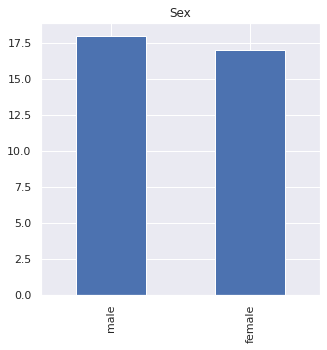

In [ ]:
#No.Of released persons cout over gender using Barplot

plt.figure(figsize=(5, 5))
plt.title('Sex')
released.sex.value_counts().plot.bar();

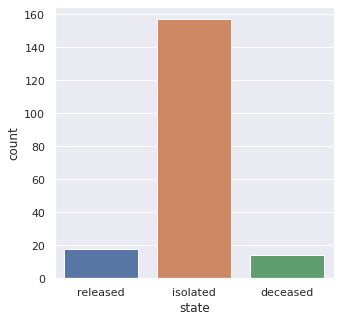

In [ ]:
# CatPlot showing state count of  Males

sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x=df['state'].loc[(df['sex']=="male")])

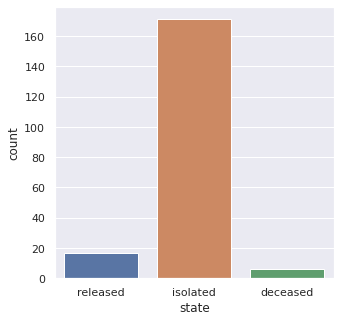

In [ ]:
#CatPlot showing State count of Females

sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x=df['state'].loc[(df['sex']=="female")])

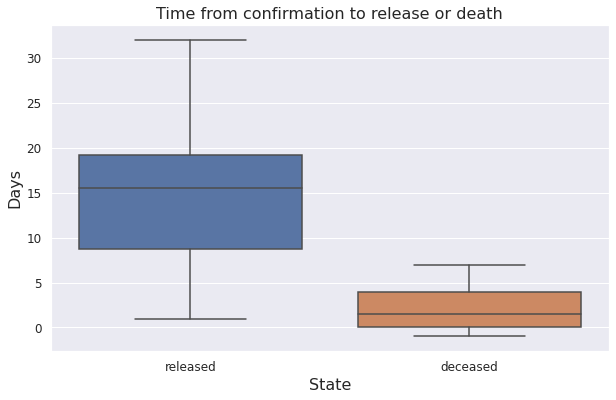

In [ ]:
 plt.figure(figsize=(10, 6))
sns.boxplot(x="state",
            y="duration_days",
            order=["released", "deceased"],
            data=df)
plt.title("Time from confirmation to release or death", fontsize=16)
plt.xlabel("State", fontsize=16)
plt.ylabel("Days", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

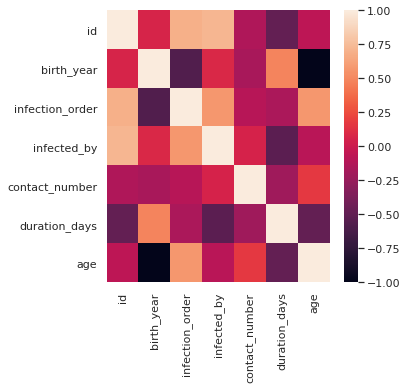

In [ ]:
sns.heatmap(df.corr())